# Projeto - Customer Satisfaction Ecommerce

O objetivo deste projeto prático é analisar a satisfação do cliente a partir de um conjunto de dados de ecommerce do Brasil.

O dataset utilizado no projeto é o Olist, um conjunto de
dados de ecommerce do Brasil.

Link dos dados: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

# Colunas da tabela:

1. order_status: status do pedido (entregue ou cancelado) (delivered or canceled).

2. order_purchase_timestamp: timestamp (data/hora) da compra de cada item.

3. order_delivered_customer_date: data real de entrega do pedido do cliente.

4. order_estimated_delievy_date: data de entrega estimada que foi fornecida ao cliente no momento da compra.

5. shipping_limit_date: data limite de envio do vendedor para a transferência do pedido ao parceiro logístico.

6. payment_sequential: método de pagamento utilizado pelo consumidor.

7. payment_type: método de pagamento preferido do cliente.

8. payment_installments: número de parcelas de pagamento preferido do cliente.

9. payment_value: valor da transação.

10. price: custo de cada item.

11. freight_value: custo de transporte para cada item (se um pedido tiver mais de um item, o valor do frete é dividido entre os itens).

12. product_category: categoria de cada item.

13. product_name_length: número de caracteres extraídos do nome do produto.

14. product_description_length: número de caracteres extraídos da descrição do produto.

15. product_photos_qty: número de fotos de produtos que foram publicadas.

16. review_score: classificação dada por um cliente em uma pesquisa de satisfação que varia de 1 a 5.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Caminho dos arquivos para acesso aos dados
diretorio = 'https://raw.githubusercontent.com/andressaapio/pythontutorials/main/data/olist/' 

In [8]:
#carrega dataset com os pedidos
orders = pd.read_csv(diretorio +'olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [21]:
#carrega dataset com as avaliações dos pedidos
order_reviews = pd.read_csv(diretorio + 'olist_order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [22]:
#carrega dataset com infos sobre os pedidos
order_payments = pd.read_csv(diretorio + 'olist_order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [23]:
#carrega dataset do consumidor
customer = pd.read_csv(diretorio + 'olist_customers_dataset.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [24]:
#carrega dataset com os itens dos pedidos
order_items = pd.read_csv(diretorio + 'olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [25]:
# carrega dataset sobre os produtos
products = pd.read_csv(diretorio + 'olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [26]:
# carrega dataset sobre os vendedores
sellers = pd.read_csv(diretorio + 'olist_sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [27]:
# carrega dataset com a tradução dos produtos
product_translation = pd.read_csv(diretorio + 'product_category_name_translation.csv')
product_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


# Merge dos datasets

Função merge é utilizada para mesclar dois datasets por meio de colunas ou índices comuns

## Merge de todos os dados com relação ao consumidor

In [29]:
A = pd.merge(orders, order_reviews, on='order_id')
A = pd.merge(A, order_payments,on='order_id')
A = pd.merge(A, customer,on='customer_id')
A.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


## Merge de todos os dados com relação ao vendedor

In [30]:
B = pd.merge(order_items,products,on='product_id')
B = pd.merge(B,sellers,on='seller_id')
B = pd.merge(B,product_translation,on='product_category_name')
B.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff


## Merge dos dados de consumidor e vendedor

In [32]:
df_ecommerce = pd.merge(A, B, on = 'order_id')
df_ecommerce.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto


In [33]:
#Selecionando apenas as colunas importantes
df_ecommerce = df_ecommerce[['order_status','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date',
                              'shipping_limit_date','payment_sequential','payment_type','payment_installments','payment_value',
                              'price','freight_value','product_category_name_english','product_name_lenght','product_description_lenght',
                              'product_photos_qty','review_score']]

df_ecommerce = df_ecommerce.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length',
                                            'product_category_name_english': 'product_category'})

df_ecommerce.head()

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score
0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4
1,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4
2,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4
3,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4
4,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5


In [35]:
df_ecommerce.shape

(115609, 16)

# Removendo os dados nulos (NaN)

In [36]:
df_ecommerce.isnull().sum()

order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2400
order_estimated_delivery_date       0
shipping_limit_date                 0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
price                               0
freight_value                       0
product_category                    0
product_name_length                 0
product_description_length          0
product_photos_qty                  0
review_score                        0
dtype: int64

In [38]:
df_ecommerce.dropna(how = 'any', inplace = True) #Qualquer linha que for nula ele remove e mantem essa motificação
df_ecommerce.shape

(113209, 16)

## Converter em formato de data

In [39]:
df_ecommerce['order_purchase_timestamp']

0         2017-10-02 10:56:33
1         2017-10-02 10:56:33
2         2017-10-02 10:56:33
3         2018-07-24 20:41:37
4         2018-08-08 08:38:49
                 ...         
115604    2018-02-06 12:58:58
115605    2017-08-27 14:46:43
115606    2018-01-08 21:28:27
115607    2018-01-08 21:28:27
115608    2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 113209, dtype: object

In [40]:
cols = ['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'shipping_limit_date']
for col in cols:
    df_ecommerce[col] = pd.to_datetime(df_ecommerce[col]).dt.date

In [41]:
df_ecommerce['order_purchase_timestamp']

0         2017-10-02
1         2017-10-02
2         2017-10-02
3         2018-07-24
4         2018-08-08
             ...    
115604    2018-02-06
115605    2017-08-27
115606    2018-01-08
115607    2018-01-08
115608    2018-03-08
Name: order_purchase_timestamp, Length: 113209, dtype: object

Quantos dias estimados para a entrega? 

In [42]:
df_ecommerce['delivery_days'] = df_ecommerce['order_delivered_customer_date'] - df_ecommerce['order_purchase_timestamp']
df_ecommerce['estimated_days'] = df_ecommerce['order_estimated_delivery_date'] - df_ecommerce['order_purchase_timestamp']
df_ecommerce['shipping_days'] = df_ecommerce['shipping_limit_date'] - df_ecommerce['order_purchase_timestamp']

In [44]:
df_ecommerce['shipping_days']

0        4 days
1        4 days
2        4 days
3        6 days
4        5 days
          ...  
115604   6 days
115605   9 days
115606   4 days
115607   4 days
115608   7 days
Name: shipping_days, Length: 113209, dtype: timedelta64[ns]

Transformando o timedelta em um valor inteiro

In [45]:
cols = ['delivery_days', 'estimated_days', 'shipping_days']
for col in cols:
    df_ecommerce[col] = df_ecommerce[col].apply(lambda x: x.days)

In [46]:
df_ecommerce['delivery_days']

0          8
1          8
2          8
3         14
4          9
          ..
115604    22
115605    25
115606    17
115607    17
115608     8
Name: delivery_days, Length: 113209, dtype: int64

Removendo as colunas que não serão utilizadas

In [47]:
df_ecommerce.drop(['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                   'shipping_limit_date'],axis=1,inplace=True)

In [48]:
df_ecommerce.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
0,delivered,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
1,delivered,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
2,delivered,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
3,delivered,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4,14,20,6
4,delivered,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5,9,27,5


# Resultados

## Os 10 produtos mais comprados pelos clientes

In [66]:
fig_size = (18,8)
font_size = 16
title_font_size = 20

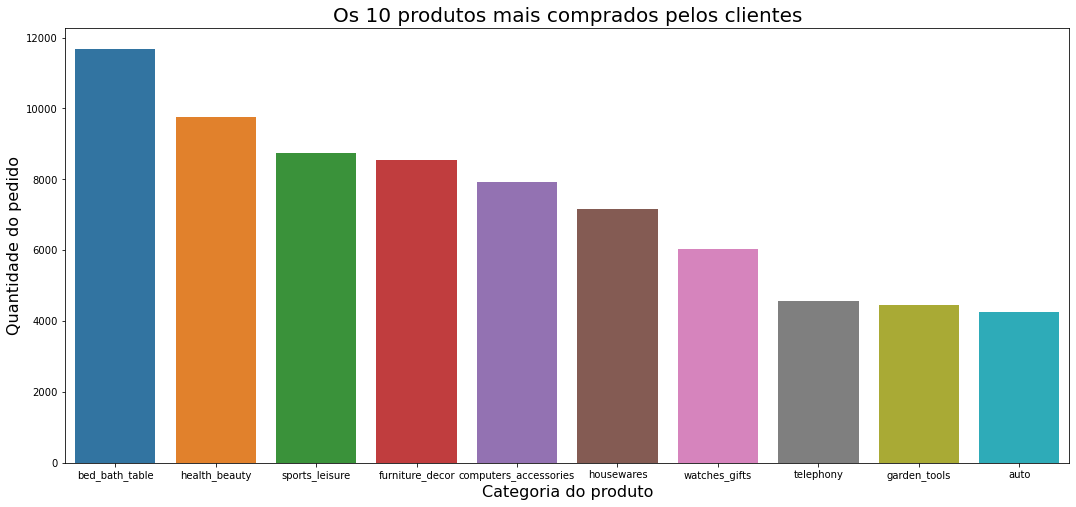

In [73]:
fig = plt.figure(figsize = fig_size)

sns.barplot(x = df_ecommerce.product_category.value_counts().index[:10], 
            y = df_ecommerce.product_category.value_counts()[:10])


plt.xlabel('Categoria do produto', fontsize = font_size)
plt.ylabel('Quantidade do pedido', fontsize = font_size)
plt.title("Os 10 produtos mais comprados pelos clientes", fontsize = title_font_size)

plt.show()

É possível observar que os produtos mais comprados pelos clientes estão na categoria de cama, mesa e banho, sendo aproximadamente 12000 pedidos.

## Valor de pagamento por cliente com base no tipo de pagamento

In [10]:
def bar_plot_df(x_var, y_var, title):
    fig = plt.figure(figsize = fig_size)
    sns.barplot(x = x_var, 
              y = y_var, data=df_ecommerce)

    plt.xlabel(x_var, fontsize = font_size)
    plt.ylabel(y_var, fontsize = font_size)
    plt.title(title, fontsize = title_font_size)
  
    plt.show()

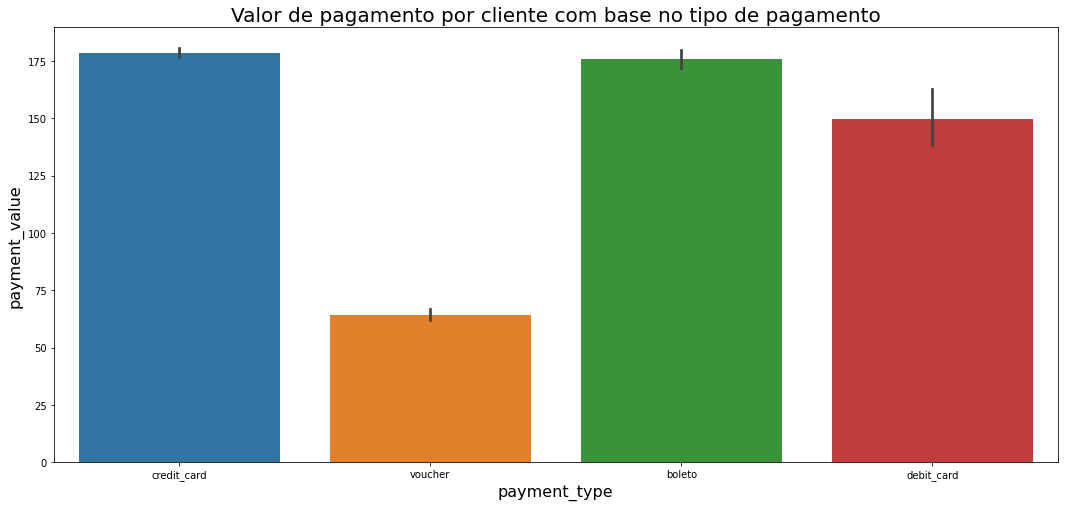

In [75]:
bar_plot_df('payment_type', 'payment_value', 'Valor de pagamento por cliente com base no tipo de pagamento')

O maior valor de pagamento ocorre através do cartão de crédito, em seguida os boletos, cartão de débito e por último o voucher. 

## Avaliação do cliente com relação ao valor

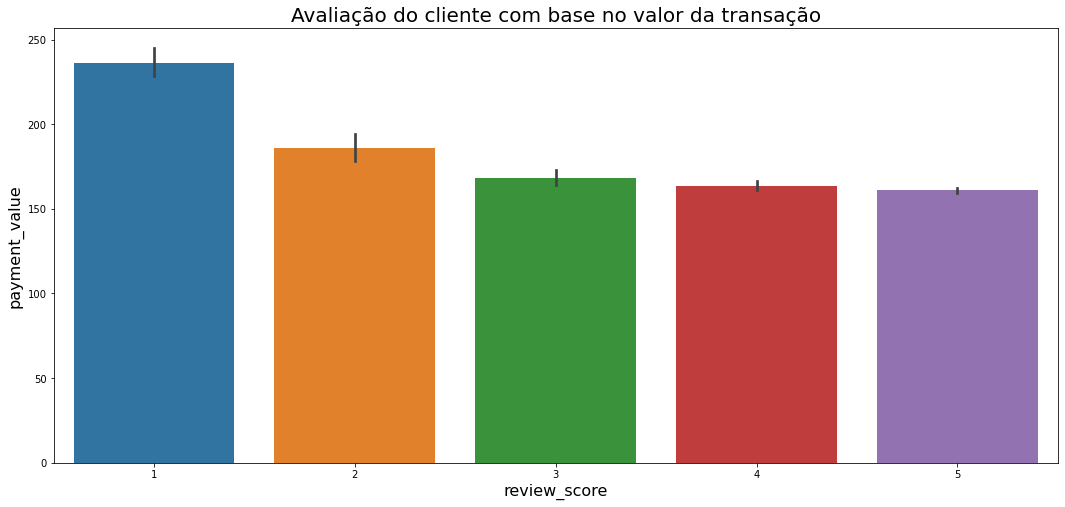

In [77]:
bar_plot_df('review_score', 'payment_value', 'Avaliação do cliente com base no valor da transação')

Foi observado que quando o valor é menor a avaliação do cliente aumenta.

## Avaliação do cliente com base no valor do frete

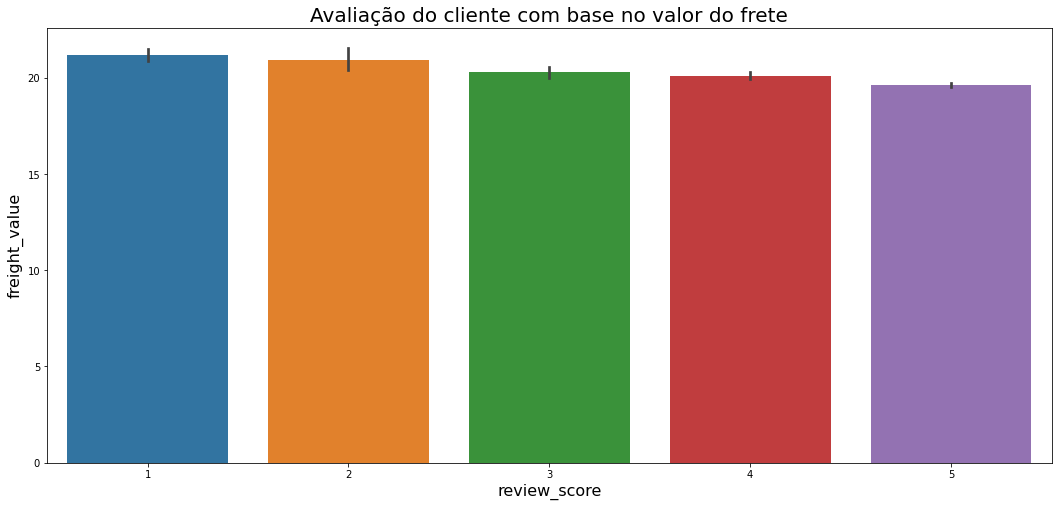

In [62]:
bar_plot_df('review_score', 'freight_value', 'Avaliação do cliente com base no valor do frete')

Neste caso, pode ser observado que quanto menor for o valor do frete mais satisfeito estará o cliente. 

## Avaliação do cliente com base no valor de cada item

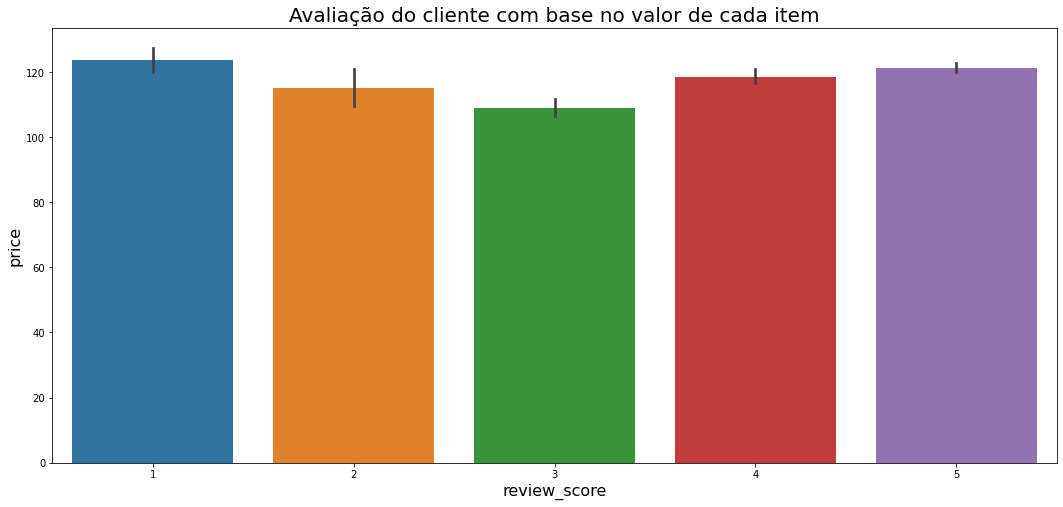

In [81]:
bar_plot_df('review_score', 'price', 'Avaliação do cliente com base no valor de cada item')

Pode ser visto que o valor do preço não interfere na avaliação do cliente. 

# Referências

1. DELFT STACK. Fundir Pandas DataFrames no Índice. Delft Stack, 2021.

2. ESTRELLA, Caio. Pandas: combinando data frames com merge() e concat(). Data
Hackers, 2020.

3. MATPLOTLIB. Matplotlib 3.5.2. Documentation.

4. PANDAS. Pandas Documentation.

5. SEABORN. Seaborn: Statistical Data Visualization.